In [1]:
#imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt


In [2]:
#2.1

df = pd.read_csv('insurance.csv')

Insurance = df.values[:, 1:-1]


labelencoder = LabelEncoder()
df['sex'] = labelencoder.fit_transform(df['sex'])
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df['region'] = labelencoder.fit_transform(df['region'])

print(df.info)

<bound method DataFrame.info of       age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]>


In [3]:
#1.2
insurance_fea = df.drop('charges', axis=1).values
charges = df['charges'].values
charges = charges / np.max(charges)

Xlr_train,Xlr_test,ylr_train,ylr_test = train_test_split(insurance_fea,
                                                 charges,
                                                 test_size=0.2,
                                                 random_state=42)
print(Xlr_train.shape)
print(Xlr_test.shape)


# normalize features
normalizer = StandardScaler()
Xlr_train = normalizer.fit_transform(Xlr_train)
Xlr_test = normalizer.transform(Xlr_test)

(1070, 6)
(268, 6)


In [4]:
#1.3
lr = LinearRegression()

lr.fit(Xlr_train,ylr_train)

print("bias is "+str(lr.intercept_))
print("coefficients  is "+str(lr.coef_))

ylr_train_pred = lr.predict(Xlr_train)

lr_train_mae = mean_absolute_error(ylr_train_pred,ylr_train)
lr_train_mse = mean_squared_error(ylr_train_pred,ylr_train)
lr_train_rmse = np.sqrt(lr_train_mse)

print('prediction for training set:')
print('MAE is: {}'.format(lr_train_mae))
print('MSE is: {}'.format(lr_train_mse))
print('RMSE is: {}'.format(lr_train_rmse))

bias is 0.20928336460705027
coefficients  is [ 5.67051024e-02 -1.47293258e-04  3.18064131e-02  8.10191467e-03
  1.49867951e-01 -4.74182139e-03]
prediction for training set:
MAE is: 0.06599864797091509
MSE is: 0.00916737434945697
RMSE is: 0.09574640645714579


prediction for testing set:
MAE is: 0.06564969107169769
MSE is: 0.008270951713078177
RMSE is: 0.09094477287386107


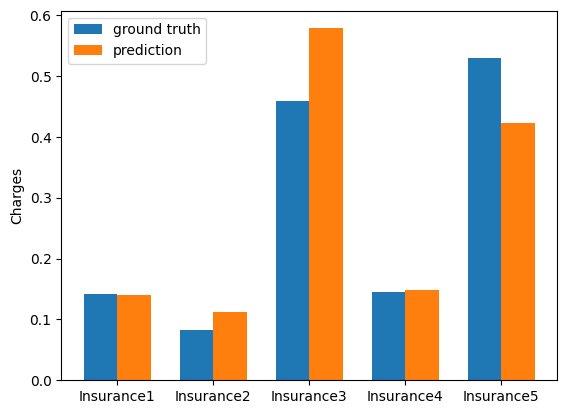

In [5]:
#1.4
ylr_test_pred = lr.predict(Xlr_test)

lr_test_mae = mean_absolute_error(ylr_test_pred,ylr_test)
lr_test_mse = mean_squared_error(ylr_test_pred,ylr_test)
lr_test_rmse = np.sqrt(lr_test_mse)

print('prediction for testing set:')
print('MAE is: {}'.format(lr_test_mae))
print('MSE is: {}'.format(lr_test_mse))
print('RMSE is: {}'.format(lr_test_rmse))


labels = ['Insurance1', 'Insurance2', 'Insurance3', 'Insurance4', 'Insurance5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ylr_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, ylr_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Charges')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [6]:
#1.5
insurance_fea = df.drop('charges', axis=1).values
charges = df['charges'].values
charges = charges / np.max(charges)

Xr_train,Xr_test,yr_train,yr_test = train_test_split(insurance_fea,
                                                 charges,
                                                 test_size=0.2,
                                                 random_state=42)
print(Xr_train.shape)
print(Xr_test.shape)


# normalize features
normalizer = StandardScaler()
Xr_train = normalizer.fit_transform(Xr_train)
Xr_test = normalizer.transform(Xr_test)

alphas = [0.1, 1.0, 100.0]

for alpha in alphas:
    ridge = Ridge(alpha)
    
    ridge.fit(Xr_train,yr_train)
    
    print("bias is "+str(ridge.intercept_))
    print("coefficients  is "+str(ridge.coef_))
    
    yr_train_pred = ridge.predict(Xr_train)
    
    ridge_train_mae = mean_absolute_error(yr_train_pred,yr_train)
    ridge_train_mse = mean_squared_error(yr_train_pred,yr_train)
    ridge_train_rmse = np.sqrt(ridge_train_mse)
    
    yr_test_pred = ridge.predict(Xr_test)
    
    ridge_test_mae = mean_absolute_error(yr_test_pred,yr_test)
    ridge_test_mse = mean_squared_error(yr_test_pred,yr_test)
    ridge_test_rmse = np.sqrt(ridge_test_mse)

    print('prediction for linear reg testing set:')
    print('MAE is: {}'.format(lr_test_mae))
    print('MSE is: {}'.format(lr_test_mse))
    print('RMSE is: {}'.format(lr_test_rmse))
    print('\n')
    print('prediction for ridge (alpha: {}) testing set:'.format(alpha))
    print('MAE is: {}'.format(ridge_test_mae))
    print('MSE is: {}'.format(ridge_test_mse))
    print('RMSE is: {}'.format(ridge_test_rmse))
    print('\n')
    print('MAE difference: {}'.format(abs(lr_test_mae-ridge_test_mae)))
    print('MSE difference: {}'.format(abs(lr_test_mse-ridge_test_mse)))
    print('RMSE difference: {}'.format(abs(lr_test_rmse-ridge_test_rmse)))
    print('\n')


(1070, 6)
(268, 6)
bias is 0.20928336460705027
coefficients  is [ 5.66993576e-02 -1.46253412e-04  3.18039167e-02  8.10168706e-03
  1.49853576e-01 -4.74098902e-03]
prediction for linear reg testing set:
MAE is: 0.06564969107169769
MSE is: 0.008270951713078177
RMSE is: 0.09094477287386107


prediction for ridge (alpha: 0.1) testing set:
MAE is: 0.06565198712488948
MSE is: 0.008271112026766076
RMSE is: 0.09094565424893086


MAE difference: 2.296053191797043e-06
MSE difference: 1.6031368789935774e-07
RMSE difference: 8.813750697889144e-07


bias is 0.20928336460705027
coefficients  is [ 5.66477072e-02 -1.36912304e-04  3.17814658e-02  8.09963575e-03
  1.49724329e-01 -4.73350751e-03]
prediction for linear reg testing set:
MAE is: 0.06564969107169769
MSE is: 0.008270951713078177
RMSE is: 0.09094477287386107


prediction for ridge (alpha: 1.0) testing set:
MAE is: 0.06567262940074665
MSE is: 0.008272576669548306
RMSE is: 0.09095370618918344


MAE difference: 2.2938329048968753e-05
MSE differen